<a href="https://colab.research.google.com/github/MudassirABBASSi/Age-Prediction/blob/main/Age_Prediction_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyforest
from pyforest import*

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15897 sha256=50df26c412de1f718158cec1d13d470010f6742134d7c5c4e422c7104119d61e
  Stored in directory: /root/.cache/pip/wheels/50/94/94/c8224da834a4db55f67c86feb7c742111ff051d5f3e17127d8
Successfully built pyforest


In [ ]:
df = pd.read_csv('/content/Age Prediction.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age_group                    2278 non-null   object 
 2   Age                          2278 non-null   int64  
 3   Gender                       2278 non-null   int64  
 4   PAQ605                       2278 non-null   int64  
 5   Body Mass Index              2278 non-null   float64
 6   Blood Glucose after fasting  2278 non-null   int64  
 7   Diabetic or not              2278 non-null   int64  
 8   Respondent's Oral            2278 non-null   int64  
 9   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 178.1+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Age_group,0
Age,0
Gender,0
PAQ605,0
Body Mass Index,0
Blood Glucose after fasting,0
Diabetic or not,0
Respondent's Oral,0
Blood Insulin Levels,0


In [ ]:
df.sample(5)

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
36,73756,Adult,56,1,1,25.6,94,2,106,2.85
2136,83033,Adult,60,2,2,24.2,91,2,137,8.89
2242,83562,Adult,21,2,2,21.1,96,2,83,6.85
1536,80505,Adult,46,1,2,26.0,96,2,83,5.04
783,77099,Adult,14,1,2,34.7,94,2,118,76.99


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2278.0,78691.853819,2921.365151,73564.00,76171.75,78749.00,81213.50,83727.00
Age,2278.0,41.795874,20.156111,12.00,24.00,41.00,58.00,80.00
Gender,2278.0,1.511414,0.499979,1.00,1.00,2.00,2.00,2.00
PAQ605,2278.0,1.822651,0.398918,1.00,2.00,2.00,2.00,7.00
Body Mass Index,2278.0,27.955180,7.248962,14.50,22.80,26.80,31.20,70.10
Blood Glucose after fasting,2278.0,99.553117,17.889834,63.00,91.00,97.00,104.00,405.00
Diabetic or not,2278.0,2.016242,0.185556,1.00,2.00,2.00,2.00,3.00
Respondent's Oral,2278.0,114.978929,47.061239,40.00,87.00,105.00,130.00,604.00
Blood Insulin Levels,2278.0,11.834794,9.718812,0.14,5.86,9.04,14.44,102.29


In [ ]:
df['Age_group'].value_counts()

,count
Age_group,
Adult,1914
Senior,364


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate OneHotEncoder
enc = OneHotEncoder()

# Reshape the column to 2D, then fit the encoder
enc.fit(df['Age_group'].values.reshape(-1, 1))

# Transform the 'Age_group' column into a one-hot encoded array
en = enc.transform(df['Age_group'].values.reshape(-1, 1)).toarray()

# Create a DataFrame for the one-hot encoded features with appropriate column names
onehot_df = pd.DataFrame(en, columns=enc.get_feature_names_out(['Age_group']))

# Concatenate the original DataFrame with the new one-hot encoded DataFrame
df = pd.concat([df, onehot_df], axis=1)

# Drop the original 'Age_group' column (if not needed anymore)
df.drop(['Age_group'], axis=1, inplace=True)


In [ ]:
df.head()

,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels,Age_group_Adult,Age_group_Senior
0,73564,61,2,2,35.7,110,2,150,14.91,1.0,0.0
1,73568,26,2,2,20.3,89,2,80,3.85,1.0,0.0
2,73576,16,1,2,23.2,89,2,68,6.14,1.0,0.0
3,73577,32,1,2,28.9,104,2,84,16.15,1.0,0.0
4,73580,38,2,1,35.9,103,2,81,10.92,1.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

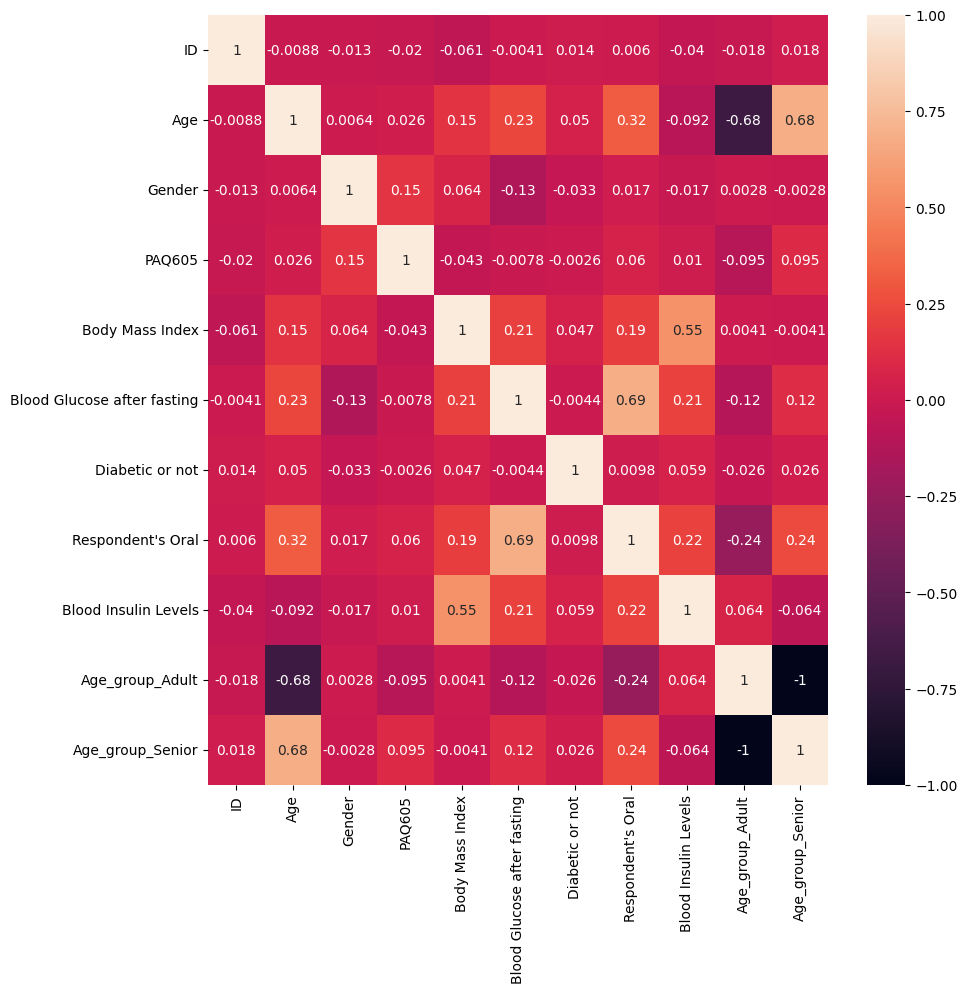

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and you've already handled categorical variables

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_array = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

# 'scaled_df' now contains the standardized features


In [ ]:
df.head()

,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels,Age_group_Adult,Age_group_Senior
0,73564,61,2,2,35.7,110,2,150,14.91,1.0,0.0
1,73568,26,2,2,20.3,89,2,80,3.85,1.0,0.0
2,73576,16,1,2,23.2,89,2,68,6.14,1.0,0.0
3,73577,32,1,2,28.9,104,2,84,16.15,1.0,0.0
4,73580,38,2,1,35.9,103,2,81,10.92,1.0,0.0


In [ ]:
scaled_df.head()

,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels,Age_group_Adult,Age_group_Senior
0,-1.755679,0.952979,0.977428,0.444672,1.068639,0.584085,-0.087553,0.744323,0.316487,0.436094,-0.436094
1,-1.754310,-0.783849,0.977428,0.444672,-1.056270,-0.590024,-0.087553,-0.743427,-0.821762,0.436094,-0.436094
2,-1.751571,-1.280085,-1.023094,0.444672,-0.656125,-0.590024,-0.087553,-0.998470,-0.586084,0.436094,-0.436094
3,-1.751228,-0.486107,-1.023094,0.444672,0.130367,0.248625,-0.087553,-0.658413,0.444103,0.436094,-0.436094
4,-1.750201,-0.188365,0.977428,-2.062661,1.096235,0.192715,-0.087553,-0.722174,-0.094147,0.436094,-0.436094


In [ ]:
# prompt: create the model ANN with keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'scaled_df' is your DataFrame with scaled features
# and you want to predict 'Age' (replace with your target variable)

# Define X (features) and y (target)
x = scaled_df.drop('Age', axis=1)  # Features
y = scaled_df['Age']  # Target variable

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x.shape[1],)))  # Input layer
model.add(Dense(3200, activation='relu'))  # Hidden layer
model.add(Dense(320, activation='relu'))
model.add(Dense(1))  # Output layer (regression)

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['accuracy']) # Mean Squared Error for regression

# Train the model
model.fit(X, y, epochs=3, batch_size=32) # Adjust epochs and batch_size as needed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X' is not defined

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# prompt: model = LinearRegression(copy_X: True, fit_intercept: False, n_jobs: -1, positive: False)
# model.fit(x_train,y_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=False)
model.fit(x_train, y_train)


In [ ]:
model.score(x_test,y_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
y_pre = model.predict(x_test)

In [ ]:
# prompt: model.score(y_pre,y_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1],
    'positive': [True, False]
}

GridSearch = GridSearchCV(model, param_grid, cv=10, verbose=1)
GridSearch.fit(x_train, y_train)
GridSearch.best_params_


In [ ]:
# prompt: model.score(y_pre,y_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
